## 학생 가해자 유형

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl                 # 패키지 관련
import matplotlib.font_manager as fm     # 패키지 리소스 즉 자원 중 폰트 관련 모듈

In [2]:
#폰트 파일의 경로 저장.
font_path = r'C:\Windows\Fonts\gulim.ttc'

# matplotlib 패키지에 한글 폰트 설정. 
myfont = fm.FontProperties(fname = font_path).get_name() 

#FontProperties 객체가 됨.
mpl.rc('font', family = myfont)

In [3]:
# ================================================================================
# 함수 이름 : clean
# 함수 기능 : 행과 열 인덱스를 맞춤
# 변     수 : 파일을 지정해야하여 변수로 설정해야함
# ----------------------------------------------------------
def clean(file):
    # 1열은 필요없으므로 건너뛴 상태로 csv파일 부름
    F = pd.read_csv(file, skiprows = 1)       

    # 형변환
    F['특성별(1)'] = F['특성별(1)'].astype('category')
    F['특성별(2)'] = F['특성별(2)'].astype('category')

    # 멀티인덱스 설정
    F.set_index(['특성별(1)','특성별(2)'], inplace = True)

    # 정보 확인
    F.info()                

    return F

In [4]:
# 함수 이름 : withdraw
# 함수 기능 : 해당 데이터프레임에서 연령별, 학력별, 소득별 자료를 반환하는 함수.
# ======================================================================================
def withdraw_student(cyberDF) :
    #cyberDF파일에서 학령별 자료 추출
    cyberDF_age=cyberDF.xs('학령별', level = 0)

    #cyberDF파일에서 학업성적별 자료 추출
    cyberDF_edu=cyberDF.xs('학업성적별', level = 0)

    #cyberDF파일에서 가정형편별 자료 추출
    cyberDF_income=cyberDF.xs('가정형편별', level = 0)

    return cyberDF_age.T, cyberDF_edu.T, cyberDF_income.T

In [5]:
# 함수 이름 : draw_graph
# 함수 기능 : 데이터프레임으로 막대그래프 그리기.
# ==========================================================
def draw_graph(age, edu, income) :
    # age에서 학령별 그래프 출력
    g_age = age.plot(kind='barh')
    plt.title('[학령별]')
    plt.xlabel('%', loc = 'right')    
    # edu에서 학업성적별 그래프 출력
    g_edu = edu.plot(kind='barh')
    plt.title('[학업성적별]')
    plt.xlabel('%', loc = 'right')
    
    # income에서 가정형편별
    g_income = income.plot(kind='barh')
    plt.title(f'[가정형편별]')
    plt.xlabel('%', loc = 'right')
    plt.show()

In [6]:
file1 = '../학생_가해경험/사이버폭력_가해_경험_20240119191526.csv'

# 결과값으로 info() 출력
cyberDF1 = clean(file1)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   가해 경험률    30 non-null     float64
 1   사이버 언어폭력  30 non-null     float64
 2   사이버 명예훼손  30 non-null     float64
 3   사이버 스토킹   30 non-null     float64
 4   사이버 성폭력   30 non-null     float64
 5   신상정보 유출   30 non-null     float64
 6   사이버 따돌림   30 non-null     float64
 7   사이버 갈취    30 non-null     float64
 8   사이버 강요    30 non-null     float64
dtypes: float64(9)
memory usage: 4.0 KB


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   가해 경험률    30 non-null     float64
 1   사이버 언어폭력  30 non-null     float64
 2   사이버 명예훼손  30 non-null     float64
 3   사이버 스토킹   30 non-null     float64
 4   사이버 성폭력   30 non-null     float64
 5   신상정보 유출   30 non-null     float64
 6   사이버 따돌림   30 non-null     float64
 7   사이버 갈취    30 non-null     float64
 8   사이버 강요    30 non-null     float64
dtypes: float64(9)
memory usage: 4.0 KB


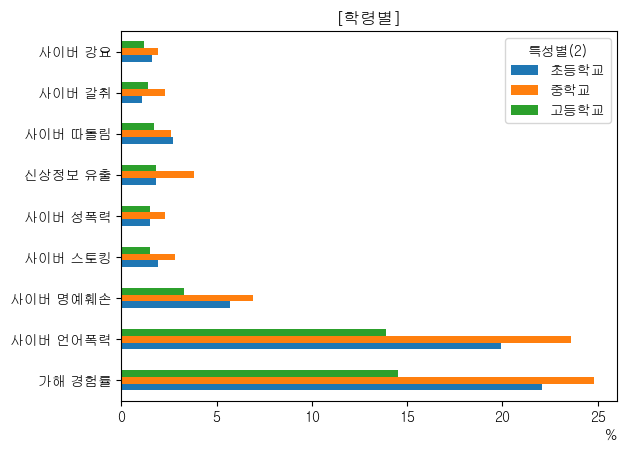

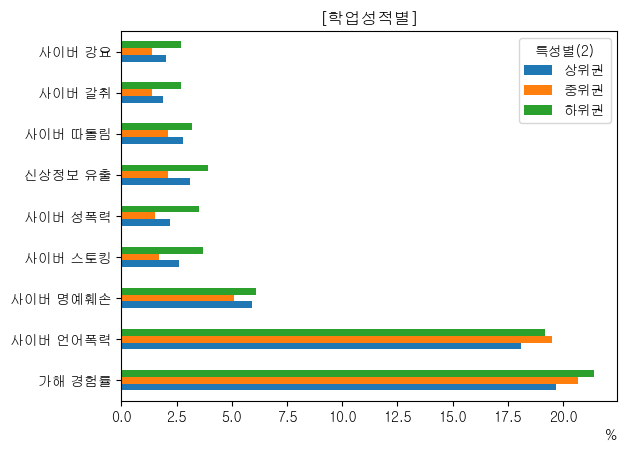

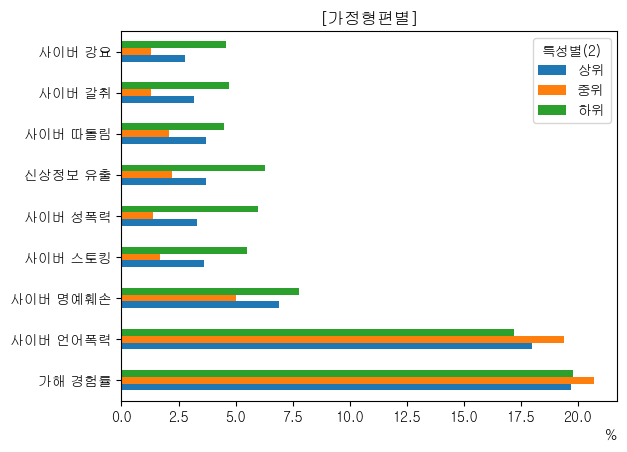

In [7]:
# 사이버폭력_가해_경험_학령별, 가정형편별, 학업성적별 자료 불러오기
file1 = '../학생_가해경험/사이버폭력_가해_경험_20240119191526.csv'

# 결과값으로 info() 출력
cyberDF1 = clean(file1)

# 사이버폭력_가해_경험_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF1_age, cyberDF1_edu, cyberDF1_income = withdraw_student(cyberDF1)

# 사이버폭력_가해경험 그래프 출력
draw_graph(cyberDF1_age, cyberDF1_edu, cyberDF1_income)

In [8]:
# cyberDF1_age.plot(kind='bar')
# plt.title('[학령별 가해경험]')

# plt.ylabel('test')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   문자 및 인스턴트 메시지 (카카오톡 라인 페이스북 메신저 텔레그램 등)  30 non-null     float64
 1   SNS (페이스북 인스타그램 블로그 등)                   30 non-null     float64
 2   온라인 게임                                   30 non-null     float64
 3   커뮤니티·동호회 (네이버·다음카페 블라인드 에스크 등)           30 non-null     float64
 4   개인 방송 서비스(유튜브 아프리카TV 트위치 틱톡 등)           30 non-null     float64
 5   메타버스(제페토 이프렌드 등)                         30 non-null     float64
 6   기타                                       30 non-null     float64
dtypes: float64(7)
memory usage: 3.6 KB


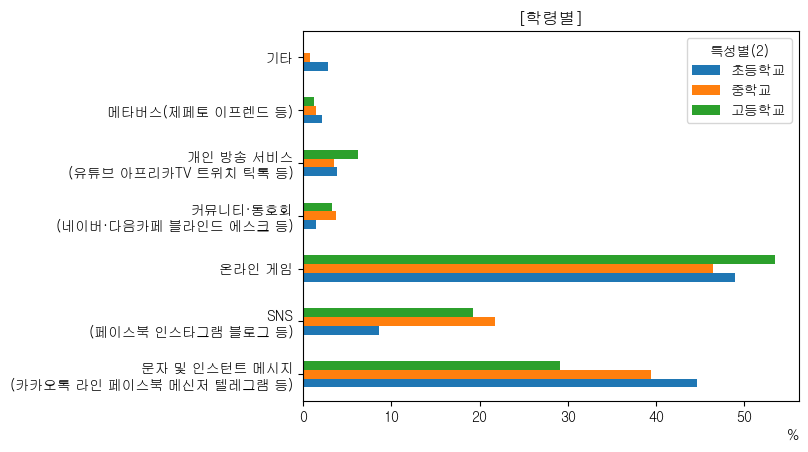

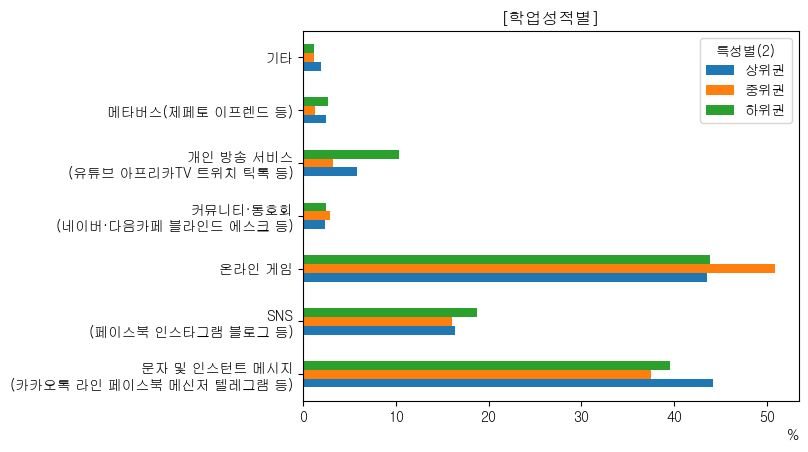

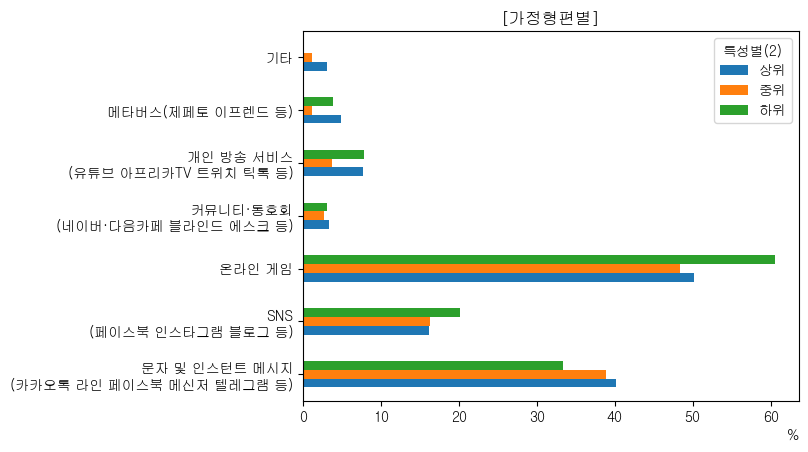

In [9]:
# 사이버폭력_가해_경로_학령별, 학업성적별, 가정형편별 자료 불러오기
file2 = '../학생_가해경험/사이버폭력_가해_경험_경로_20240119192228.csv'
cyberDF2 = clean(file2)

# 사이버폭력_가해_경로_학령별, 학업성적별, 가정형편별 자료 추출
cyberDF2_age, cyberDF2_edu, cyberDF2_income = withdraw_student(cyberDF2)
cyberDF2_age.index = ['문자 및 인스턴트 메시지\n(카카오톡 라인 페이스북 메신저 텔레그램 등)', 'SNS\n(페이스북 인스타그램 블로그 등)', '온라인 게임', 
                      '커뮤니티·동호회\n(네이버·다음카페 블라인드 에스크 등)', '개인 방송 서비스\n(유튜브 아프리카TV 트위치 틱톡 등)', '메타버스(제페토 이프렌드 등)', '기타']
cyberDF2_edu.index = ['문자 및 인스턴트 메시지\n(카카오톡 라인 페이스북 메신저 텔레그램 등)', 'SNS\n(페이스북 인스타그램 블로그 등)', '온라인 게임', 
                      '커뮤니티·동호회\n(네이버·다음카페 블라인드 에스크 등)', '개인 방송 서비스\n(유튜브 아프리카TV 트위치 틱톡 등)', '메타버스(제페토 이프렌드 등)', '기타']
cyberDF2_income.index = ['문자 및 인스턴트 메시지\n(카카오톡 라인 페이스북 메신저 텔레그램 등)', 'SNS\n(페이스북 인스타그램 블로그 등)', '온라인 게임', 
                      '커뮤니티·동호회\n(네이버·다음카페 블라인드 에스크 등)', '개인 방송 서비스\n(유튜브 아프리카TV 트위치 틱톡 등)', '메타버스(제페토 이프렌드 등)', '기타']

# 사이버폭력_가해_경로_학령별, 학업성적별, 가정형편별 자료 추출
draw_graph(cyberDF2_age, cyberDF2_edu, cyberDF2_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   상대방이 먼저 그런 행동을 해서 보복하기 위해  30 non-null     float64
 1   재미나 장난으로 스트레스 해소를 위해       30 non-null     float64
 2   상대방이 싫어서 상대방에게 화가 나서       30 non-null     float64
 3   주변에서 함께 하므로 친구들과 어울리기 위해   30 non-null     float64
 4   내 의견과 달라서 상대방이 틀린 말을 해서    30 non-null     float64
 5   그냥 특별한 이유 없이               30 non-null     float64
dtypes: float64(6)
memory usage: 3.3 KB


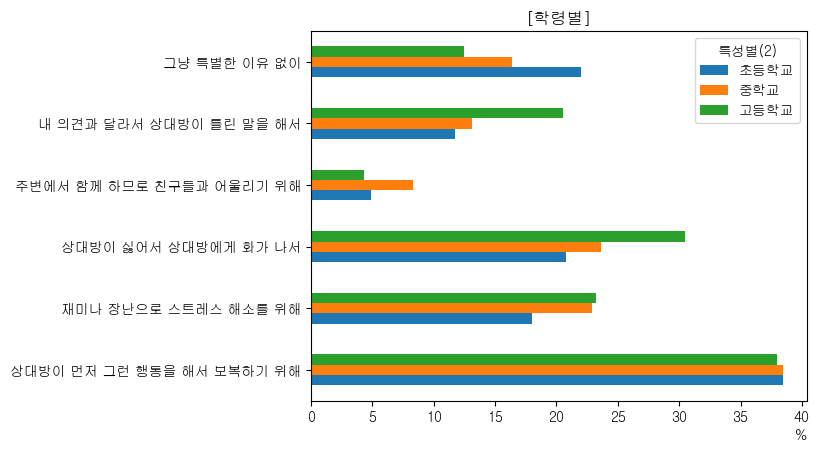

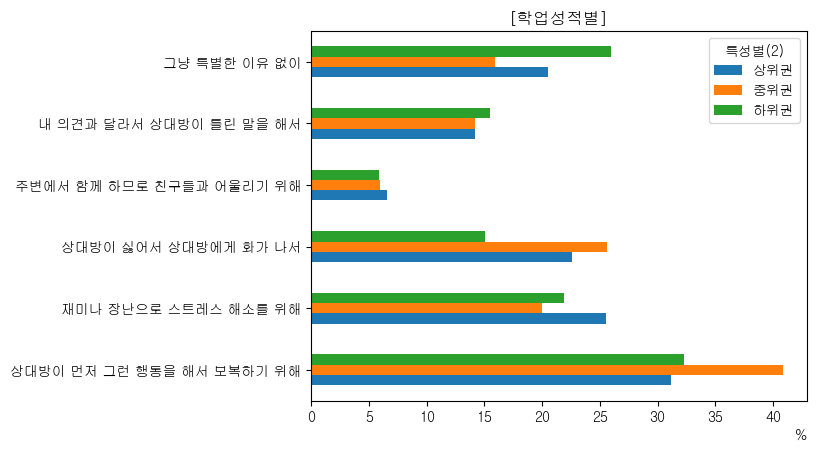

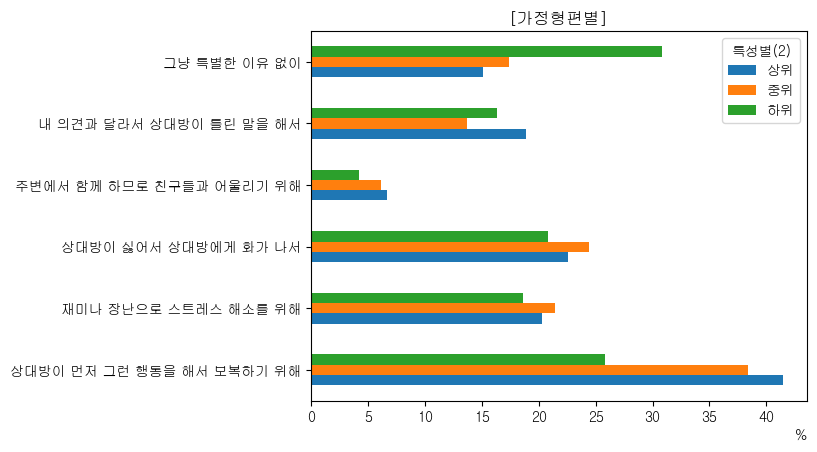

In [10]:
# 사이버폭력_가해_동기_학령별, 가정형편별, 학업성적별 자료 불러오기
file10 = '../학생_가해경험/사이버폭력_가해_동기_20240122134730.csv'
cyberDF10 = clean(file10)

# 사이버폭력_가해_동기_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF10_age, cyberDF10_edu, cyberDF10_income = withdraw_student(cyberDF10)
draw_graph(cyberDF10_age, cyberDF10_edu, cyberDF10_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   친한 친구          30 non-null     float64
 1   전혀 모르는 사람      30 non-null     float64
 2   얼굴만 아는 사이      30 non-null     float64
 3   선후배            30 non-null     float64
 4   온라인에서 알게 된 사람  30 non-null     float64
 5   유명인            30 non-null     float64
dtypes: float64(6)
memory usage: 3.3 KB


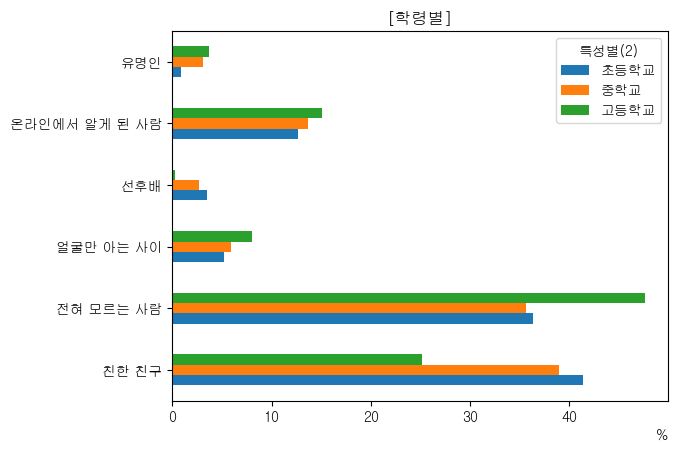

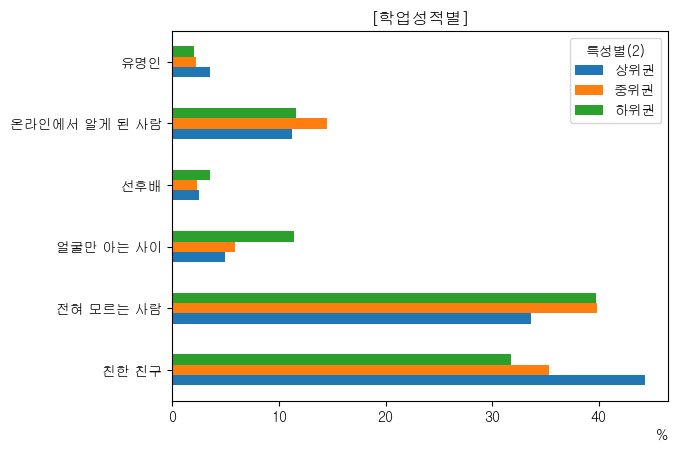

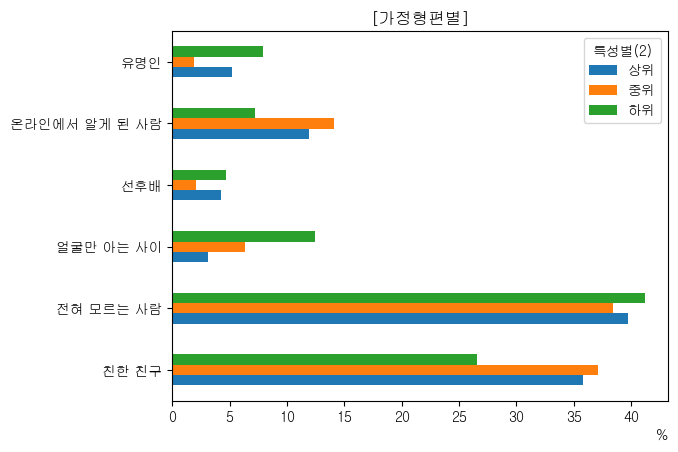

In [11]:
# 사이버폭력_가해_대상_학령별, 가정형편별, 학업성적별 자료 불러오기
file3 = '../학생_가해경험/사이버폭력_가해_대상_20240119191755.csv'
cyberDF3 = clean(file3)

# 사이버폭력_가해_대상_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF3_age, cyberDF3_edu, cyberDF3_income = withdraw_student(cyberDF3)
draw_graph(cyberDF3_age, cyberDF3_edu, cyberDF3_income)

In [12]:
# 사이버폭력_가해자_유형_학령별, 가정형편별, 학업성적별 자료 불러오기
file4 = '../학생_가해경험/사이버폭력_가해자_유형_20240122011023.csv'
cyberDF4 = clean(file4)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   전혀 모르는 사람      30 non-null     float64
 1   친한 친구          30 non-null     float64
 2   얼굴만 아는 사이      30 non-null     float64
 3   선후배            30 non-null     float64
 4   온라인에서 알게 된 사람  30 non-null     float64
dtypes: float64(5)
memory usage: 3.1 KB


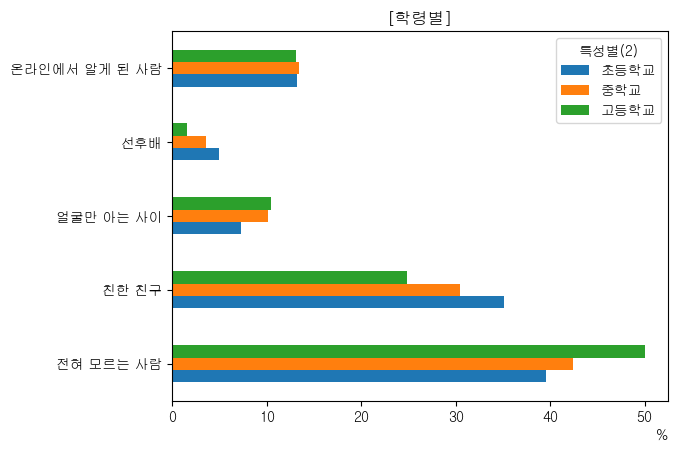

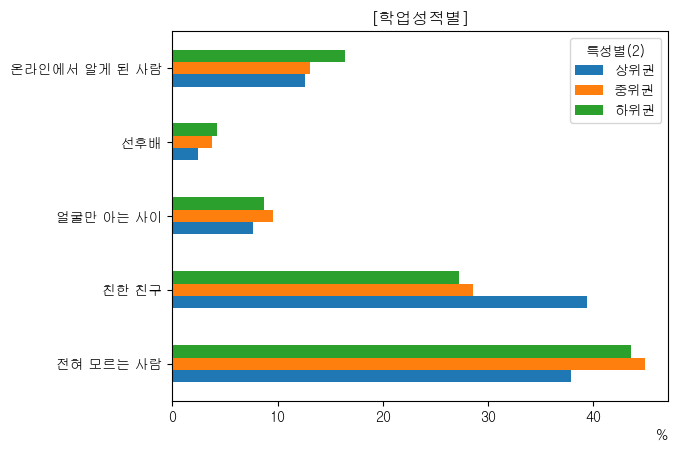

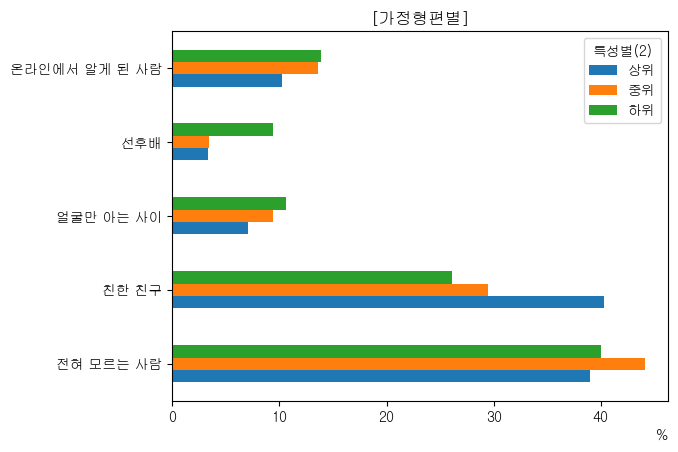

In [13]:
# 사이버폭력_가해_대상_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF4_age, cyberDF4_edu, cyberDF4_income = withdraw_student(cyberDF4)
draw_graph(cyberDF4_age, cyberDF4_edu, cyberDF4_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


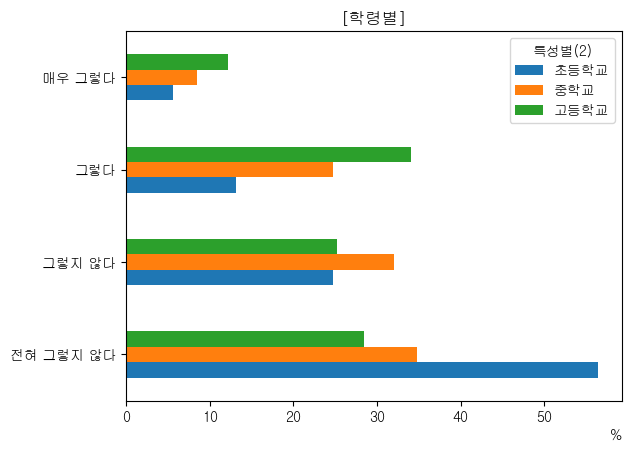

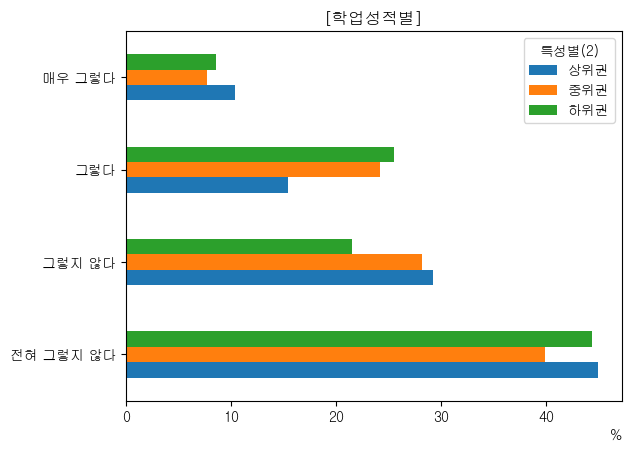

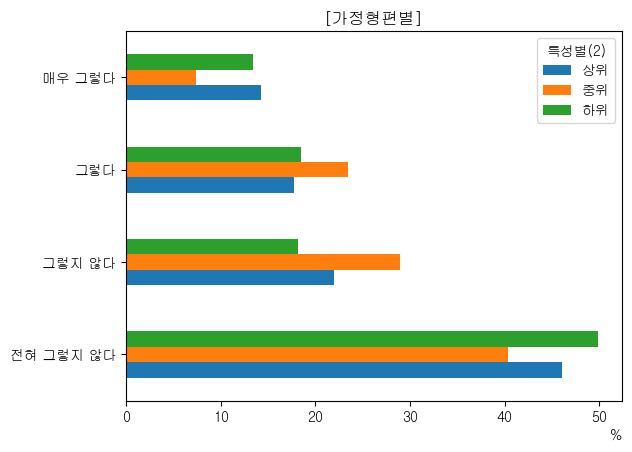

In [14]:
# 사이버폭력_가해_심리상태_학령별, 가정형편별, 학업성적별 자료 불러오기 _ 정당한 행동이라고 생각한 유형.
file5 = '../학생_가해경험/사이버폭력_가해_경험_후_심리상태__정당한_행동이라고_생각했음_20240119192603.csv'
cyberDF5 = clean(file5)

# 사이버폭력_가해_대상_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF5_age, cyberDF5_edu, cyberDF5_income = withdraw_student(cyberDF5)
draw_graph(cyberDF5_age, cyberDF5_edu, cyberDF5_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


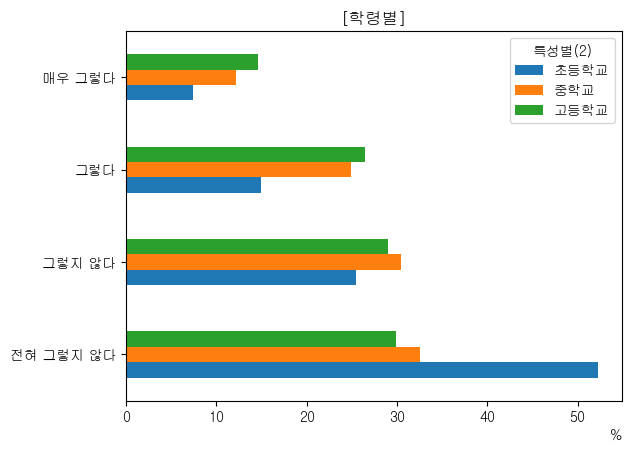

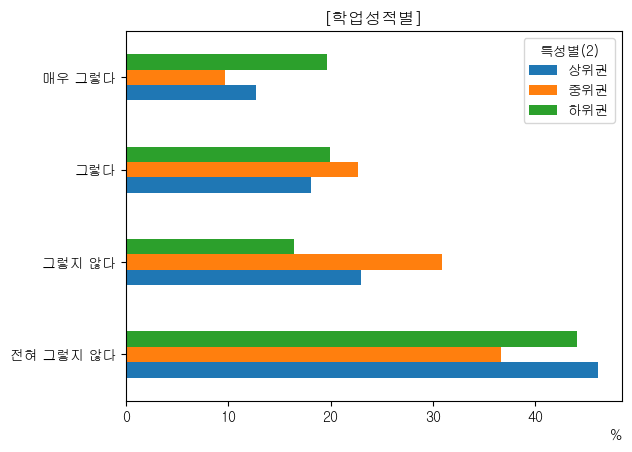

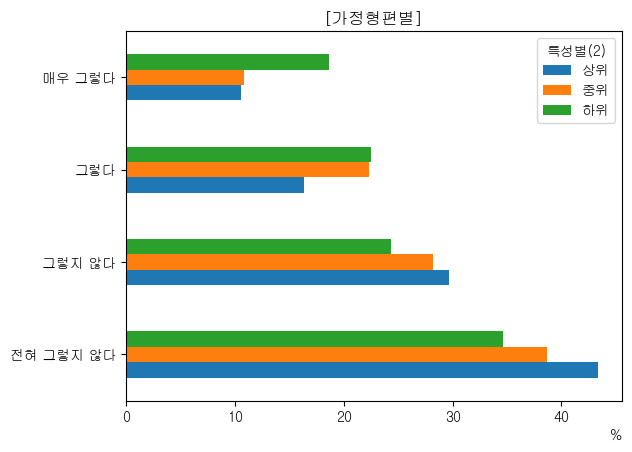

In [15]:
# 사이버폭력_가해_심리상태_학령별, 가정형편별, 학업성적별 자료 불러오기 _ 아무느낌이 없음.
file6 = '../학생_가해경험/사이버폭력_가해_경험_후_심리상태__아무런_느낌이_없었음_20240119192643.csv'
cyberDF6 = clean(file6)

# 사이버폭력_가해_대상_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF6_age, cyberDF6_edu, cyberDF6_income = withdraw_student(cyberDF6)
draw_graph(cyberDF6_age, cyberDF6_edu, cyberDF6_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


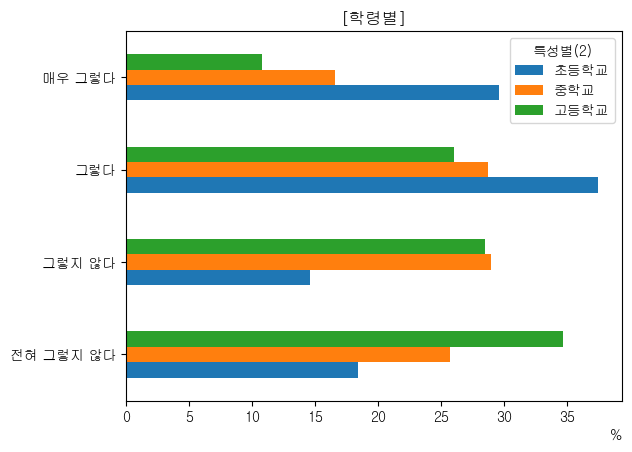

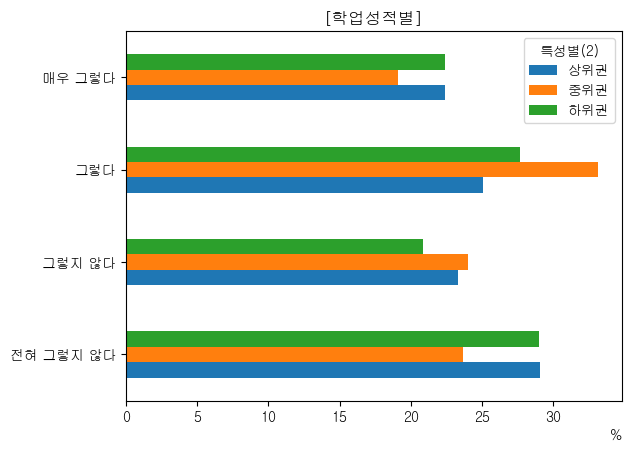

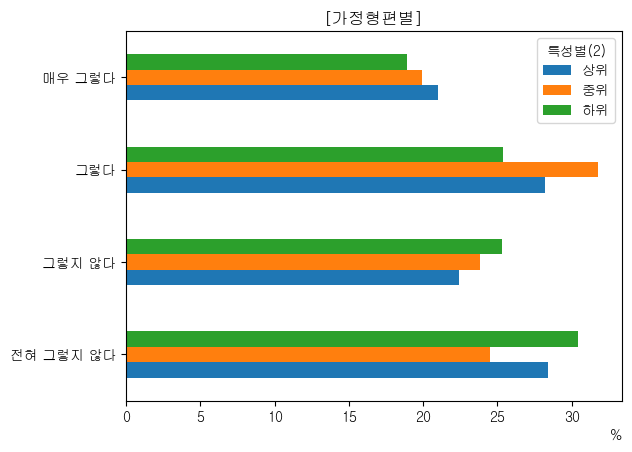

In [16]:
# 사이버폭력_가해_심리상태_학령별, 가정형편별, 학업성적별 자료 불러오기 _ _문제가_생길_것_같아_걱정되었음
file7 = '../학생_가해경험/사이버폭력_가해_경험_후_심리상태__문제가_생길_것_같아_걱정되었음_20240119192624.csv'
cyberDF7 = clean(file7)

# 사이버폭력_가해_대상_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF7_age, cyberDF7_edu, cyberDF7_income = withdraw_student(cyberDF7)
draw_graph(cyberDF7_age, cyberDF7_edu, cyberDF7_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


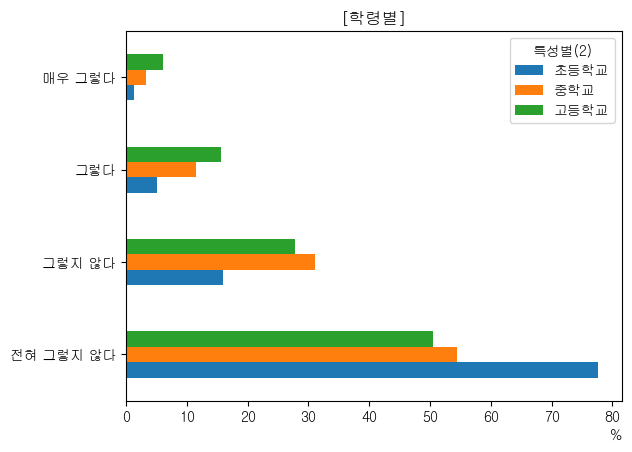

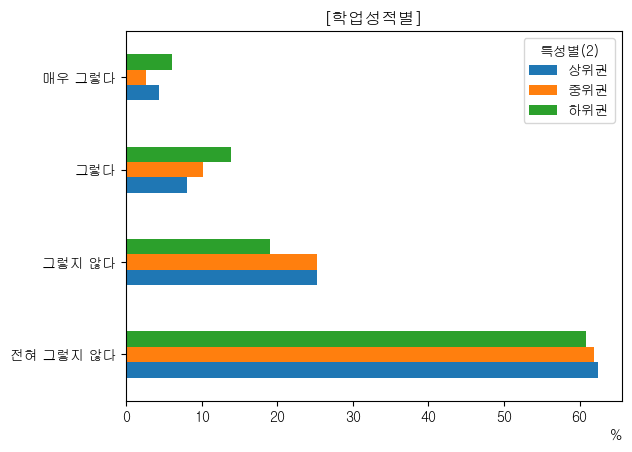

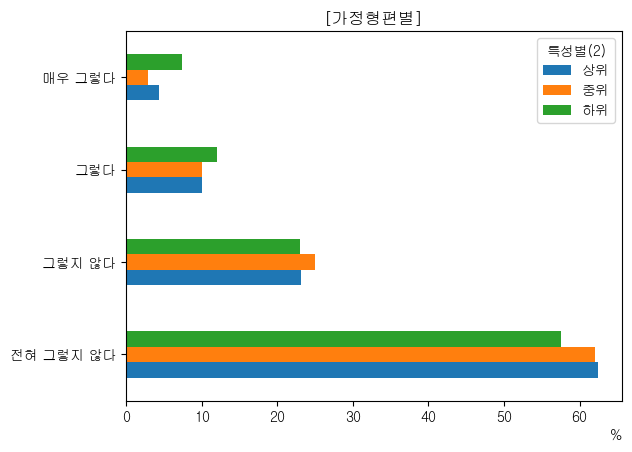

In [17]:
# 사이버폭력_가해_심리상태_학령별, 가정형편별, 학업성적별 자료 불러오기 _ 흥미롭고 재미있었음.
file8 = '../학생_가해경험/사이버폭력_가해_경험_후_심리상태__흥미롭고_재미있었음_20240119192633.csv'
cyberDF8 = clean(file8)

# 사이버폭력_가해_대상_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF8_age, cyberDF8_edu, cyberDF8_income = withdraw_student(cyberDF8)
draw_graph(cyberDF8_age,cyberDF8_edu, cyberDF8_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


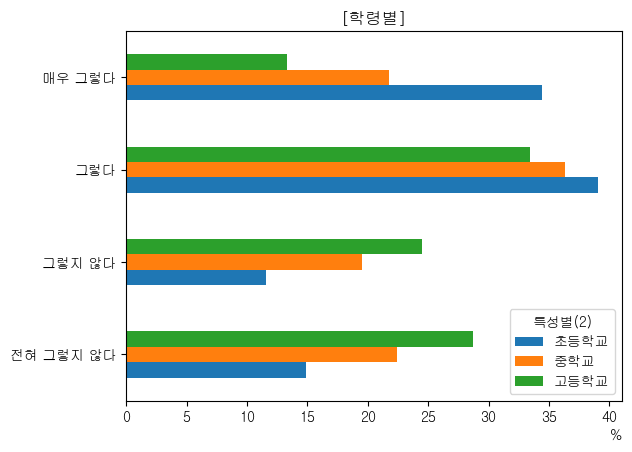

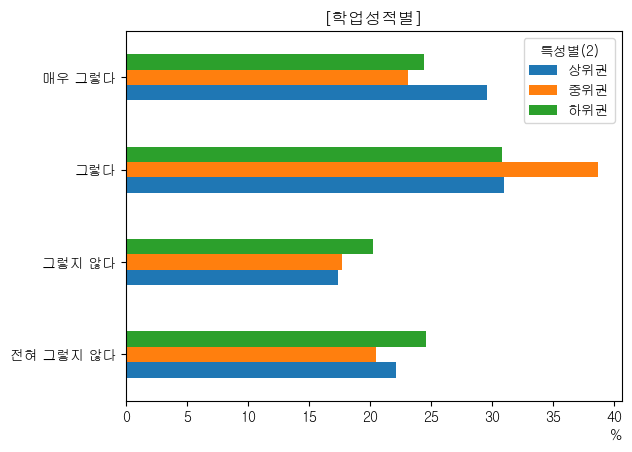

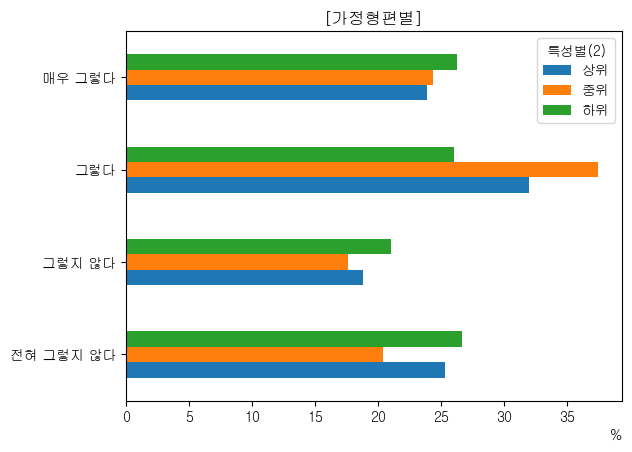

In [18]:
# 사이버폭력_가해_심리상태_학령별, 가정형편별, 학업성적별 자료 불러오기  (5) 상대방에게 미안하고 후회스러움.
file9 = '../학생_가해경험/사이버폭력_가해_경험_후_심리상태__상대방에게_미안하고_후회스러웠음_20240119192614.csv'
cyberDF9 = clean(file9)

# 사이버폭력_가해_대상_학령별, 가정형편별, 학업성적별 자료 추출
cyberDF9_age, cyberDF9_edu, cyberDF9_income = withdraw_student(cyberDF9)
draw_graph(cyberDF9_age, cyberDF9_edu, cyberDF9_income)